In [1]:
# Uber Price Predicition 

# Team Members:

    1.Anant Satpute
    2.Rahul Singh

# Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Import Datasets

In [45]:
uber_data=pd.read_csv("cab_rides.csv")
weather_data=pd.read_csv("weather.csv")

In [46]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## Transformation of data

In [47]:
uber_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [48]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [49]:
uber_data.shape

(693071, 10)

In [50]:
uber_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [51]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [52]:
weather_data.shape

(6276, 8)

In [53]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [54]:
## Removing rows for missing price

uber_data.dropna(subset=['price'],inplace=True)

uber_data.isnull().sum()


distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

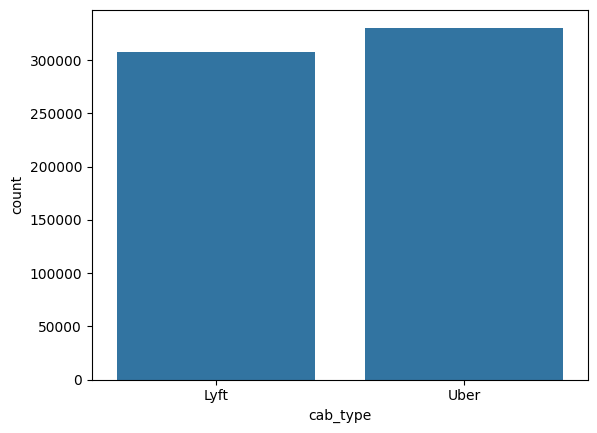

In [55]:
ax=sns.countplot(data=uber_data,x='cab_type')

###### Our analysis and prediction is on Uber Cars only therefore we select only uber and drop rest.

In [56]:
#uber_data.drop(uber_data['cab_type']=='Lyft',axis=0)
#taking lot of time to fetch

In [57]:
uber_data = uber_data.loc[uber_data['cab_type'] == 'Uber']

In [58]:
uber_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


#### We drop rain column as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction.

In [59]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


#### Convering timeStamp to Date time format for better analysis and modelling.

In [60]:
from datetime import datetime, date
uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

/tmp/ipykernel_4544/1004085708.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
/tmp/ipykernel_4544/1004085708.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)


In [61]:
uber_data['Udate']=uber_data.datetime.dt.date

In [62]:
weather_data['Wdate']=weather_data.date_time.dt.date

In [63]:
uber_data.describe()

,distance,time_stamp,price,surge_multiplier,datetime
count,330568.000000,3.305680e+05,330568.000000,330568.0,330568
mean,2.191386,1.544046e+12,15.795343,1.0,2018-12-05 21:43:18.833010432
min,0.020000,1.543204e+12,4.500000,1.0,2018-11-26 03:40:46.319000
25%,1.300000,1.543444e+12,9.000000,1.0,2018-11-28 22:28:41.980999936
50%,2.170000,1.543737e+12,12.500000,1.0,2018-12-02 07:43:02.953999872
75%,2.840000,1.544828e+12,21.500000,1.0,2018-12-14 23:00:15.048000
max,7.860000,1.545161e+12,89.500000,1.0,2018-12-18 19:15:10.943000
std,1.178973,6.897122e+08,8.560300,0.0,NaN


In [64]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,date_time
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000,6276
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812,2018-12-03 17:16:17.146430720
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000,2018-11-26 03:40:44
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500,2018-11-28 06:34:30
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000,2018-11-29 17:52:54
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000,2018-12-13 08:45:01
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000,2018-12-18 18:45:02
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466,NaN


In [65]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        6276 non-null   float64       
 1   location    6276 non-null   object        
 2   clouds      6276 non-null   float64       
 3   pressure    6276 non-null   float64       
 4   rain        894 non-null    float64       
 5   time_stamp  6276 non-null   int64         
 6   humidity    6276 non-null   float64       
 7   wind        6276 non-null   float64       
 8   date_time   6276 non-null   datetime64[ns]
 9   Wdate       6276 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 490.4+ KB


In [66]:
weather_data.size

62760

In [67]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


# Merging two Datasets

In [68]:
uber_data_Temp=uber_data.sample(n = 25000, random_state = 12345) # taking random samples
##concatenating two datasets.
UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])    

In [69]:
UberWeather.shape

(966161, 22)

In [70]:
UberWeather.isnull().sum()

distance                 0
cab_type                 0
time_stamp_x             0
destination              0
source                   0
price                    0
surge_multiplier         0
id                       0
product_id               0
name                     0
datetime                 0
Udate                    0
temp                     0
location                 0
clouds                   0
pressure                 0
rain                811444
time_stamp_y             0
humidity                 0
wind                     0
date_time                0
Wdate                    0
dtype: int64

# Handling Outliers 

In [71]:
from scipy.stats import iqr
uberdistance_iqr=iqr(UberWeather['distance'])

In [72]:
uberdistance_iqr

1.5599999999999998

In [73]:
UberWeather['distance'].describe()

count    966161.000000
mean          2.200283
std           1.182272
min           0.020000
25%           1.300000
50%           2.190000
75%           2.860000
max           7.500000
Name: distance, dtype: float64

In [74]:
q3 = 2.860000
q1 = 1.300000
iqr = q3 - q1
iqr

1.5599999999999998

In [75]:
u_limit_for_outlier = q3 + 1.5*iqr
l_limit_for_outlier = q1 - 1.5*iqr
print(u_limit_for_outlier,l_limit_for_outlier)

5.199999999999999 -1.0399999999999998


[]

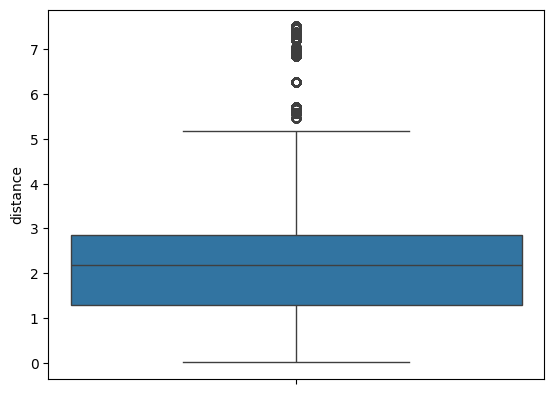

In [76]:
sns.boxplot(UberWeather['distance'])
plt.plot()

In [77]:
UberWeather.drop(UberWeather[UberWeather['distance']>5.1].index,inplace=True)

In [78]:
UberWeather.shape

(947191, 22)

[]

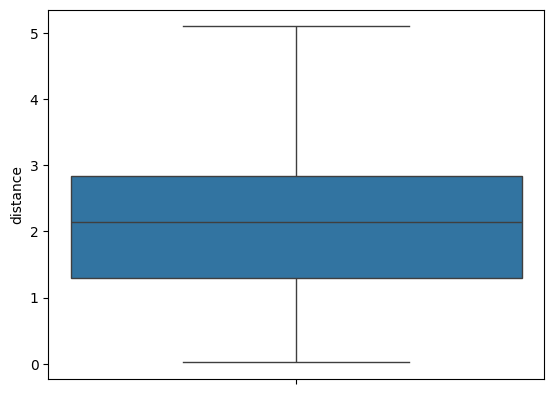

In [79]:
sns.boxplot(UberWeather['distance'])
plt.plot()

# Feature Engineering

In [80]:
# created new commputed columns Wweek(week days) and Whour(hours) in order predict price according to rising demand
UberWeather['Wweek']=UberWeather.date_time.dt.day_of_week
UberWeather['Whour']=UberWeather.date_time.dt.hour

In [81]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947191 entries, 0 to 966160
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          947191 non-null  float64       
 1   cab_type          947191 non-null  object        
 2   time_stamp_x      947191 non-null  int64         
 3   destination       947191 non-null  object        
 4   source            947191 non-null  object        
 5   price             947191 non-null  float64       
 6   surge_multiplier  947191 non-null  float64       
 7   id                947191 non-null  object        
 8   product_id        947191 non-null  object        
 9   name              947191 non-null  object        
 10  datetime          947191 non-null  datetime64[ns]
 11  Udate             947191 non-null  object        
 12  temp              947191 non-null  float64       
 13  location          947191 non-null  object        
 14  clouds   

In [82]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)
#to_numeric(a)

In [83]:
UberWeather

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.04,1003.20,NaN,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04,1,1
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.25,1003.17,NaN,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04,1,2
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.56,1004.45,NaN,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04,1,5
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.53,1003.15,NaN,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04,1,3
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.52,1003.93,NaN,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.74,999.95,NaN,1543848774,0.86,6.62,2018-12-03 14:52:54,2018-12-03,0,14
966157,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.48,999.24,NaN,1543855974,0.68,16.27,2018-12-03 16:52:54,2018-12-03,0,16
966158,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.18,1001.44,NaN,1543877574,0.55,10.59,2018-12-03 22:52:54,2018-12-03,0,22
966159,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.94,1002.28,NaN,1543809174,0.93,2.91,2018-12-03 03:52:54,2018-12-03,0,3


In [84]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947191 entries, 0 to 966160
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          947191 non-null  float64       
 1   cab_type          947191 non-null  object        
 2   time_stamp_x      947191 non-null  int64         
 3   destination       947191 non-null  object        
 4   source            947191 non-null  object        
 5   price             947191 non-null  float64       
 6   surge_multiplier  947191 non-null  float64       
 7   id                947191 non-null  object        
 8   product_id        947191 non-null  object        
 9   name              947191 non-null  object        
 10  datetime          947191 non-null  datetime64[ns]
 11  Udate             947191 non-null  object        
 12  temp              947191 non-null  float64       
 13  location          947191 non-null  object        
 14  clouds   

<Axes: >

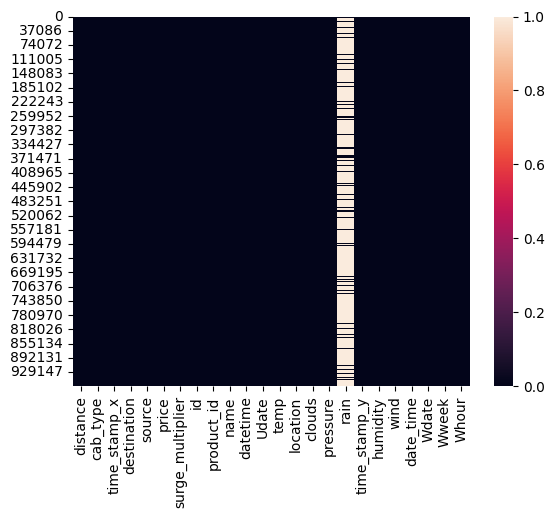

In [85]:
sns.heatmap(UberWeather.isnull())

In [86]:
UberWeather.isnull().sum()

distance                 0
cab_type                 0
time_stamp_x             0
destination              0
source                   0
price                    0
surge_multiplier         0
id                       0
product_id               0
name                     0
datetime                 0
Udate                    0
temp                     0
location                 0
clouds                   0
pressure                 0
rain                795380
time_stamp_y             0
humidity                 0
wind                     0
date_time                0
Wdate                    0
Wweek                    0
Whour                    0
dtype: int64

In [87]:
UberWeather.fillna(0,inplace=True)

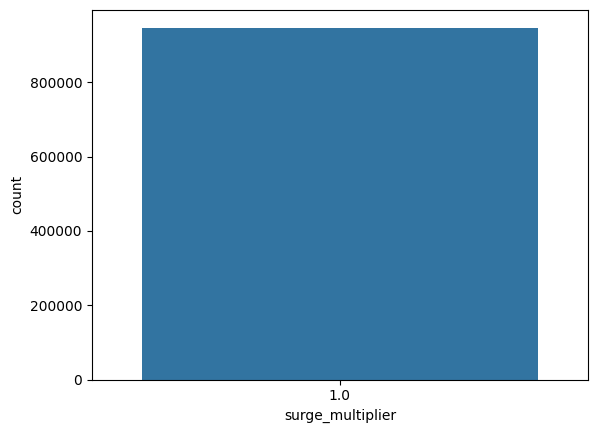

In [88]:
ax = sns.countplot(data=UberWeather, x='surge_multiplier')

In [89]:
UberWeather.surge_multiplier[UberWeather.surge_multiplier==1.0].sum()

947191.0

In [90]:
UberWeather.surge_multiplier

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
966156    1.0
966157    1.0
966158    1.0
966159    1.0
966160    1.0
Name: surge_multiplier, Length: 947191, dtype: float64

In [91]:
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_y', 'humidity', 'wind', 'date_time', 'Wdate', 'Wweek',
       'Whour'],
      dtype='object')

In [92]:
UberWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,947191,947191,947191,947191,947191,947191,947191,947191,947191,947191,...,947191,947191,947191,947191,947191,947191,947191,947191,947191,947191


In [93]:
UberWeather.to_csv("UberWeather1.csv")

# Exploratory Data Analysis with final dataset

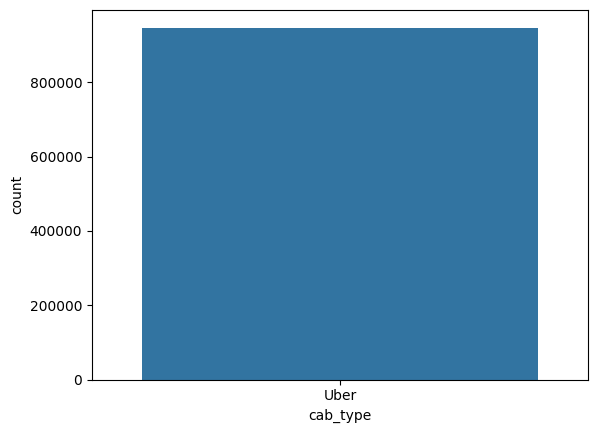

In [94]:
ax=sns.countplot(data=UberWeather, x='cab_type')

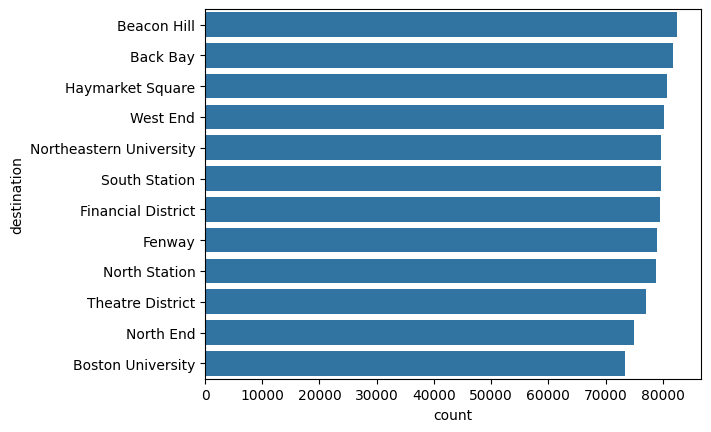

In [95]:
ax = sns.countplot(data=UberWeather, y='destination',order = UberWeather.destination.value_counts().index)  

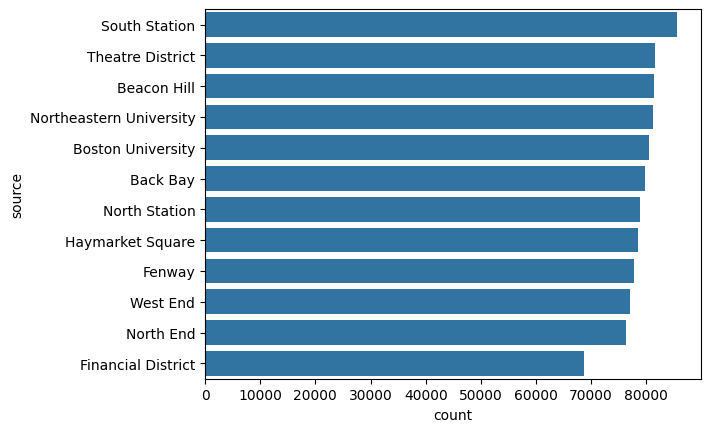

In [96]:
ax = sns.countplot(data=UberWeather, y='source', order = UberWeather.source.value_counts().index)

<Figure size 700x700 with 0 Axes>

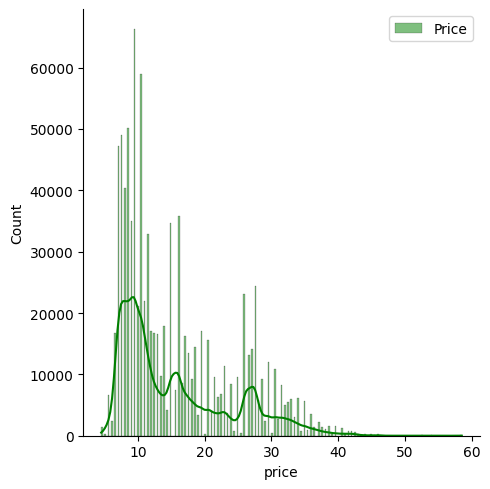

In [97]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.price, color='green',label='Price', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

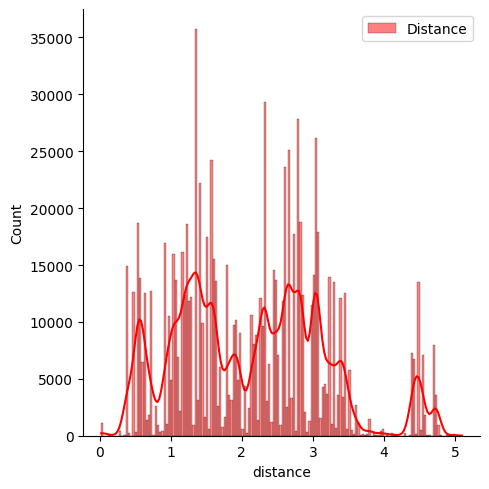

In [98]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.distance, color='red',label='Distance', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

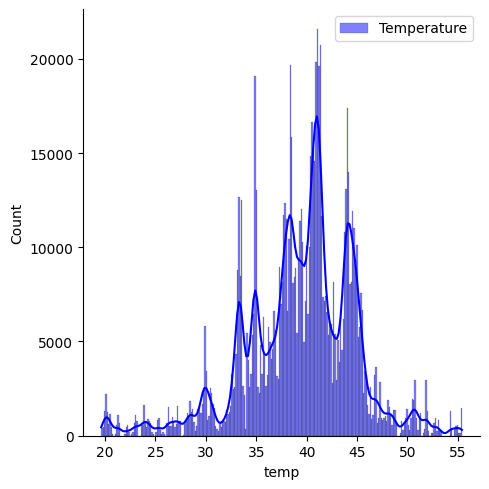

In [99]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.temp, color='blue',label='Temperature', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

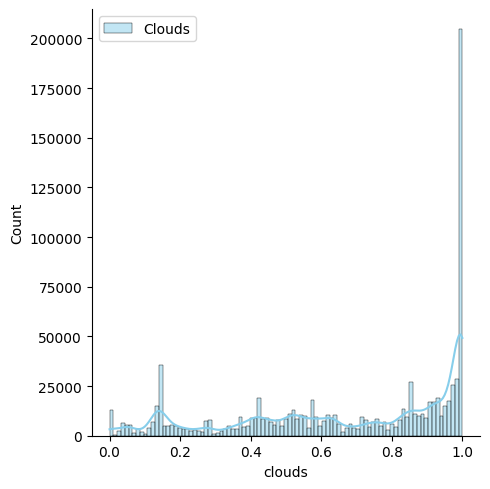

In [100]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

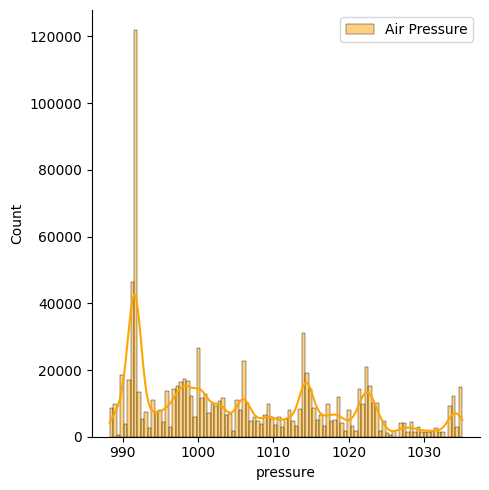

In [101]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

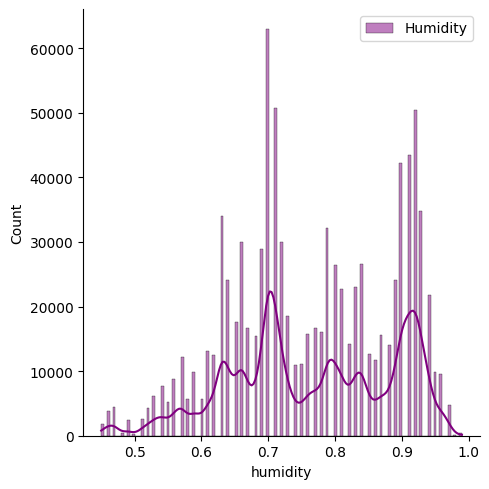

In [102]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.humidity, color='purple',label='Humidity', kde=True)
plt.legend();

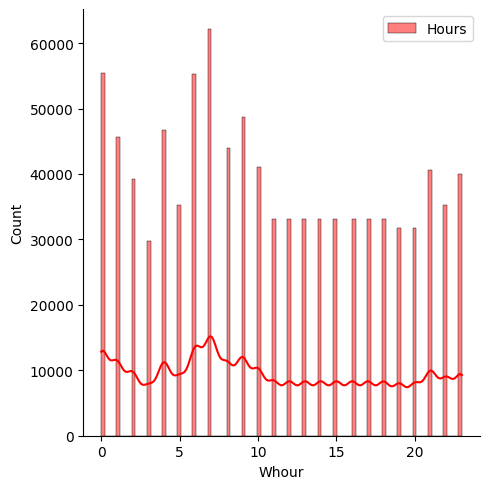

In [103]:
sns.displot(UberWeather.Whour, color='red',label='Hours', kde=True)
plt.legend();

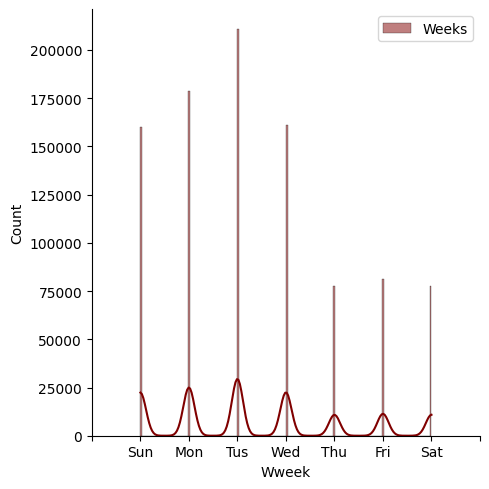

In [104]:
s = sns.displot(UberWeather.Wweek, color='maroon',label='Weeks', kde=True) 
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])
plt.legend();

<Axes: xlabel='Whour', ylabel='price'>

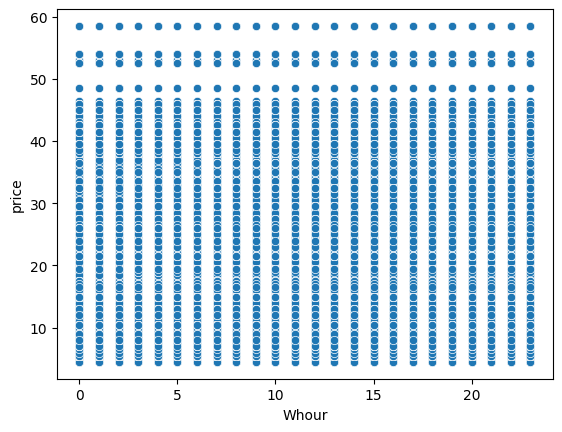

In [105]:
sns.scatterplot(data=UberWeather, x="Whour", y="price")

<Axes: xlabel='Wweek', ylabel='price'>

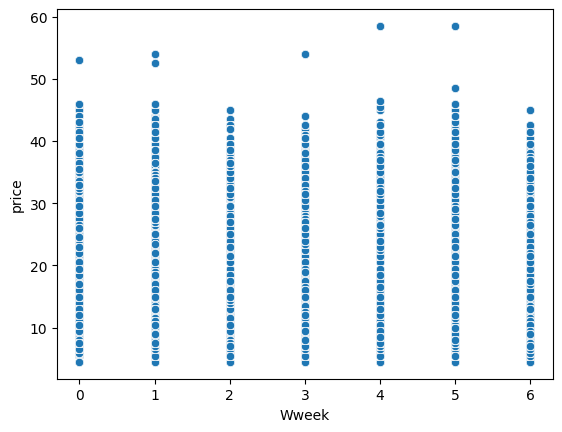

In [106]:
sns.scatterplot(data=UberWeather, x="Wweek", y="price")

<Axes: xlabel='distance', ylabel='price'>

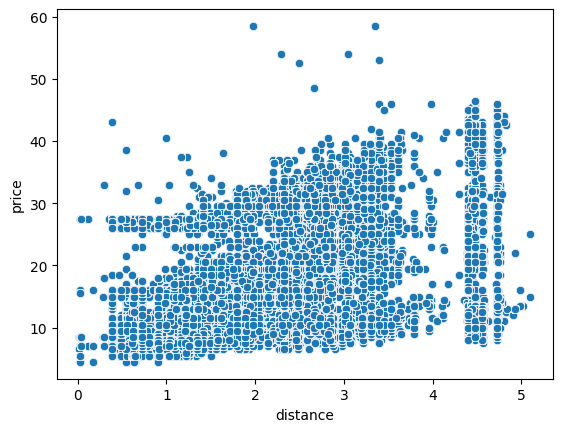

In [107]:
sns.scatterplot(data=UberWeather, x="distance", y="price")

<Axes: xlabel='temp', ylabel='price'>

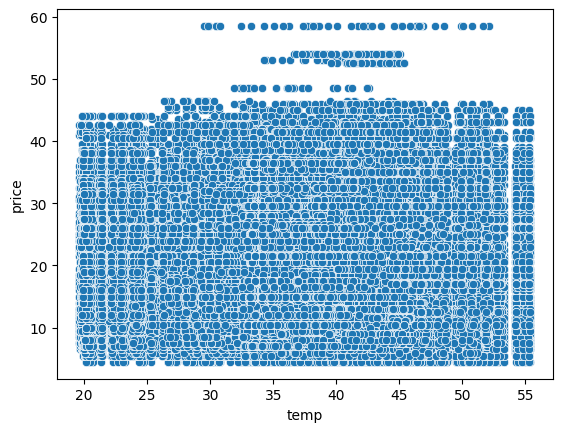

In [108]:
sns.scatterplot(data=UberWeather, x="temp", y="price")

<Axes: xlabel='clouds', ylabel='price'>

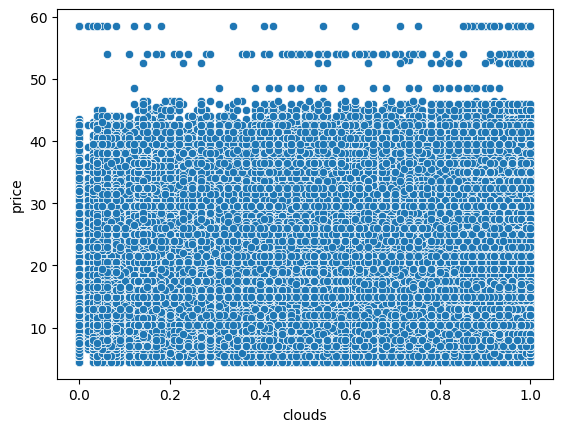

In [109]:
sns.scatterplot(data=UberWeather, x="clouds", y="price")

<Axes: xlabel='pressure', ylabel='price'>

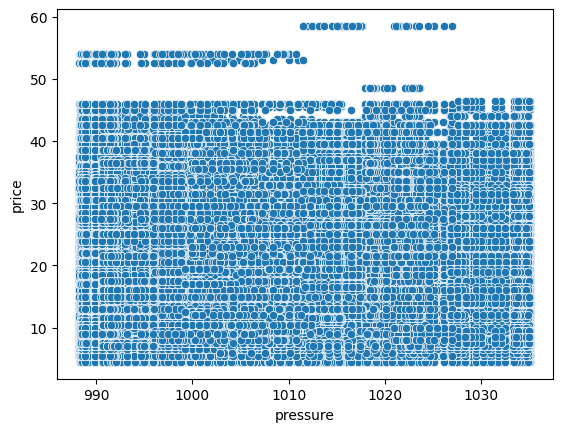

In [110]:
sns.scatterplot(data=UberWeather, x="pressure", y="price")

<Axes: xlabel='humidity', ylabel='price'>

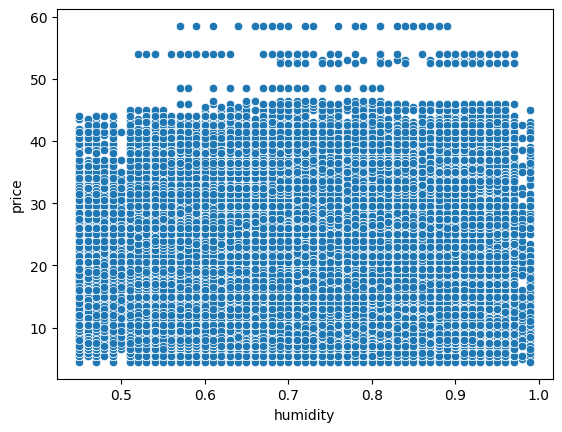

In [111]:
sns.scatterplot(data=UberWeather, x="humidity", y="price")

<Axes: xlabel='wind', ylabel='price'>

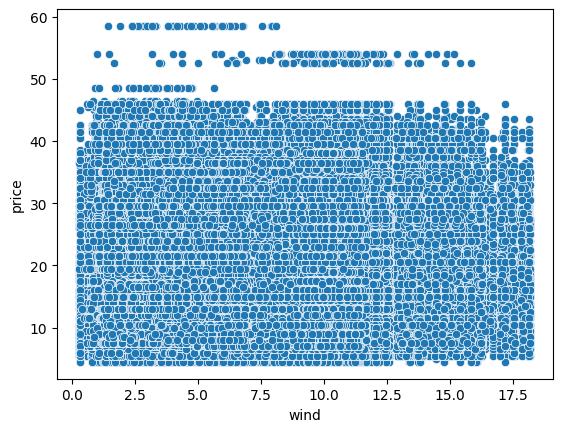

In [112]:
sns.scatterplot(data=UberWeather, x="wind", y="price")

<Axes: xlabel='rain', ylabel='price'>

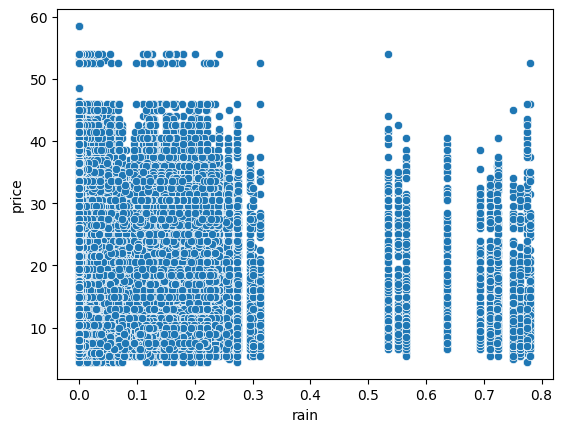

In [113]:
sns.scatterplot(data=UberWeather, x="rain", y="price")

In [114]:
desc = UberWeather.describe()
desc

,distance,time_stamp_x,price,surge_multiplier,datetime,temp,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wweek,Whour
count,947191.000000,9.471910e+05,947191.000000,947191.0,947191,947191.000000,947191.000000,947191.000000,947191.000000,9.471910e+05,947191.000000,947191.000000,947191,947191.000000,947191.000000
mean,2.118623,1.543772e+12,15.671595,1.0,2018-12-02 17:28:20.967942656,39.337716,0.676881,1005.501678,0.010998,1.543767e+09,0.766078,7.296942,2018-12-02 16:06:54.543169792,2.392767,10.736146
min,0.020000,1.543204e+12,4.500000,1.0,2018-11-26 03:40:46.320000,19.620000,0.000000,988.250000,0.000000,1.543204e+09,0.450000,0.290000,2018-11-26 03:40:44,0.000000,0.000000
25%,1.300000,1.543364e+12,9.000000,1.0,2018-11-28 00:12:22.200999936,36.350000,0.440000,992.140000,0.000000,1.543364e+09,0.680000,4.220000,2018-11-28 00:15:20,1.000000,5.000000
50%,2.140000,1.543459e+12,12.500000,1.0,2018-11-29 02:29:21.148000,40.050000,0.770000,1002.450000,0.000000,1.543456e+09,0.760000,7.430000,2018-11-29 01:40:41,2.000000,10.000000
75%,2.840000,1.543817e+12,21.000000,1.0,2018-12-03 05:58:01.952999936,42.960000,0.970000,1015.050000,0.000000,1.543820e+09,0.890000,10.060000,2018-12-03 06:52:54,3.000000,17.000000
max,5.100000,1.545161e+12,58.500000,1.0,2018-12-18 19:15:10.579000,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000,2018-12-18 18:45:02,6.000000,23.000000
std,1.036424,6.203895e+08,8.379424,0.0,NaN,5.543657,0.312145,12.969570,0.051264,6.240741e+05,0.121075,3.517852,NaN,1.814939,6.982390


In [115]:
UberWeather

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.04,1003.20,0.0,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04,1,1
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.25,1003.17,0.0,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04,1,2
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.56,1004.45,0.0,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04,1,5
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.53,1003.15,0.0,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04,1,3
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.52,1003.93,0.0,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.74,999.95,0.0,1543848774,0.86,6.62,2018-12-03 14:52:54,2018-12-03,0,14
966157,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.48,999.24,0.0,1543855974,0.68,16.27,2018-12-03 16:52:54,2018-12-03,0,16
966158,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.18,1001.44,0.0,1543877574,0.55,10.59,2018-12-03 22:52:54,2018-12-03,0,22
966159,2.72,Uber,1543824475975,West End,Fenway,10.5,1.0,a909d47d-eeef-4aeb-a001-394df13dfddd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.94,1002.28,0.0,1543809174,0.93,2.91,2018-12-03 03:52:54,2018-12-03,0,3


In [116]:
UberWeather['surge_multiplier'].value_counts()

surge_multiplier
1.0    947191
Name: count, dtype: int64

In [117]:
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind', 
                           'Wweek', 'Whour'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

In [118]:
import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')

# figure size in inches for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [119]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947191 entries, 0 to 966160
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          947191 non-null  float64       
 1   cab_type          947191 non-null  object        
 2   time_stamp_x      947191 non-null  int64         
 3   destination       947191 non-null  object        
 4   source            947191 non-null  object        
 5   price             947191 non-null  float64       
 6   surge_multiplier  947191 non-null  float64       
 7   id                947191 non-null  object        
 8   product_id        947191 non-null  object        
 9   name              947191 non-null  object        
 10  datetime          947191 non-null  datetime64[ns]
 11  Udate             947191 non-null  object        
 12  temp              947191 non-null  float64       
 13  location          947191 non-null  object        
 14  clouds   

In [120]:
UberWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.04,1003.20,0.0,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04,1,1
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.25,1003.17,0.0,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04,1,2
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.56,1004.45,0.0,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04,1,5
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.53,1003.15,0.0,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04,1,3
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.52,1003.93,0.0,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04,1,4


In [122]:
from sklearn.preprocessing import LabelEncoder
encoder_team = LabelEncoder()
UberWeather['cab_type'] = encoder_team.fit_transform(UberWeather['cab_type'])
UberWeather['destination'] = encoder_team.fit_transform(UberWeather['destination'])
UberWeather['source'] = encoder_team.fit_transform(UberWeather['source'])
UberWeather['id'] = encoder_team.fit_transform(UberWeather['id'])
UberWeather['product_id'] = encoder_team.fit_transform(UberWeather['product_id'])
UberWeather['name'] = encoder_team.fit_transform(UberWeather['name'])
UberWeather['datetime'] = encoder_team.fit_transform(UberWeather['datetime'])
UberWeather['Wdate'] = encoder_team.fit_transform(UberWeather['Wdate'])
UberWeather['location'] = encoder_team.fit_transform(UberWeather['location'])
UberWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,0,1543896180749,9,10,27.5,1.0,21517,2,1,...,0.04,1003.20,0.0,1543888374,0.60,7.75,2018-12-04 01:52:54,8,1,1
1,0.55,0,1543896180749,9,10,27.5,1.0,21517,2,1,...,0.25,1003.17,0.0,1543891974,0.62,8.44,2018-12-04 02:52:54,8,1,2
2,0.55,0,1543896180749,9,10,27.5,1.0,21517,2,1,...,0.56,1004.45,0.0,1543902774,0.64,8.21,2018-12-04 05:52:54,8,1,5
3,0.55,0,1543896180749,9,10,27.5,1.0,21517,2,1,...,0.53,1003.15,0.0,1543895574,0.62,7.36,2018-12-04 03:52:54,8,1,3
4,0.55,0,1543896180749,9,10,27.5,1.0,21517,2,1,...,0.52,1003.93,0.0,1543899174,0.63,8.05,2018-12-04 04:52:54,8,1,4


In [ ]:
### Feature Engineering

In [123]:
UberWeather = UberWeather.drop(columns=['date_time'])
print(UberWeather.head())


   distance  cab_type   time_stamp_x  destination  source  price  \
0      0.55         0  1543896180749            9      10   27.5   
1      0.55         0  1543896180749            9      10   27.5   
2      0.55         0  1543896180749            9      10   27.5   
3      0.55         0  1543896180749            9      10   27.5   
4      0.55         0  1543896180749            9      10   27.5   

   surge_multiplier     id  product_id  name  ...  location clouds  pressure  \
0               1.0  21517           2     1  ...         9   0.04   1003.20   
1               1.0  21517           2     1  ...         9   0.25   1003.17   
2               1.0  21517           2     1  ...         9   0.56   1004.45   
3               1.0  21517           2     1  ...         9   0.53   1003.15   
4               1.0  21517           2     1  ...         9   0.52   1003.93   

   rain  time_stamp_y  humidity  wind  Wdate  Wweek  Whour  
0   0.0    1543888374      0.60  7.75      8     

In [124]:
UberWeather = UberWeather.drop(columns=['Udate'])

In [125]:
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp_y',
       'humidity', 'wind', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

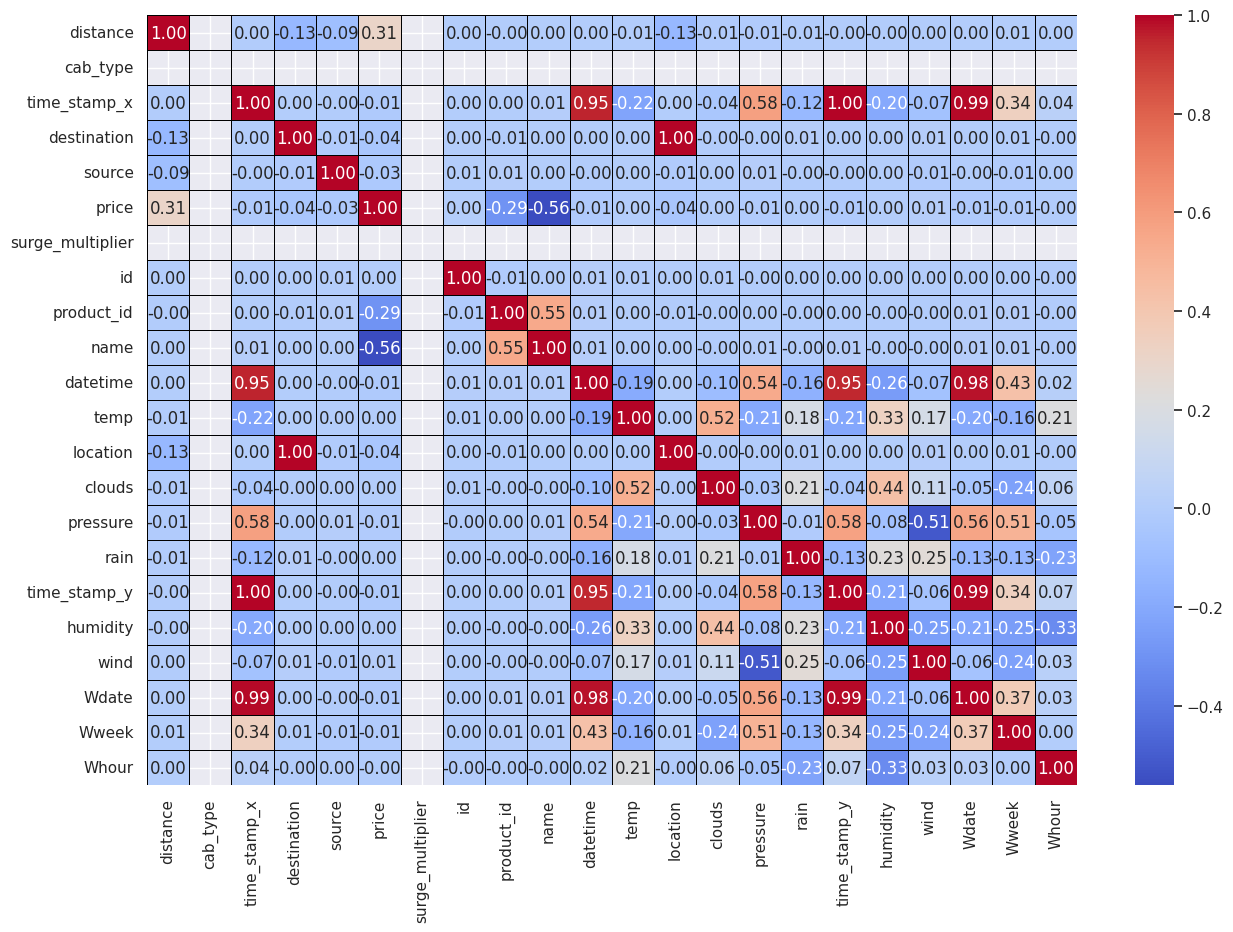

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(UberWeather.corr(),annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

In [127]:
UberWeather.columns 

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp_y',
       'humidity', 'wind', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [128]:
### Here we remove unwanted columns for modeling. We remove columns which have all values repeited and columns which have all distinct values.
UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','time_stamp_y','surge_multiplier'], axis=1)     

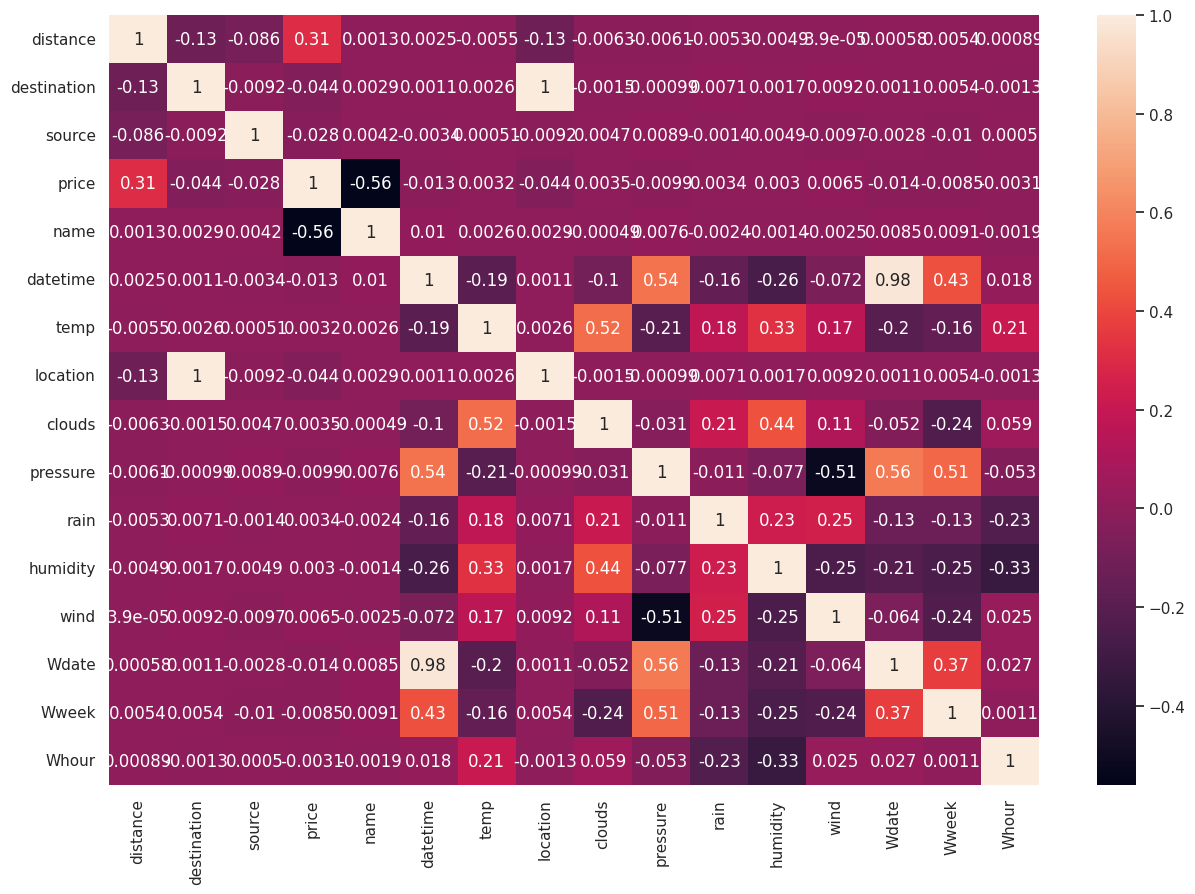

In [129]:
plt.figure(figsize=(15,10))
sns.heatmap(UberMod.corr(),annot=True)
plt.show()

In [130]:
UberMod.columns

Index(['distance', 'destination', 'source', 'price', 'name', 'datetime',
       'temp', 'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [131]:
### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [132]:
## Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.
le = LabelEncoder()
classes_and_values ={}
UberMod.source = le.fit_transform(UberMod.source)
classes= le.classes_
assigned_values =le.transform(classes)

    # Store the classes and their assigned values in the dictionary
classes_and_values['source']=dict(zip(classes, assigned_values))

UberMod.destination = le.fit_transform(UberMod.destination)
classes_1 = le.classes_
assigned_values_1=le.transform(classes_1)

    # Store the classes and their assigned values in the dictionary
classes_and_values['destination']=dict(zip(classes_1, assigned_values_1))

UberMod.name = le.fit_transform(UberMod.name)
classes_2= le.classes_
assigned_values_2=le.transform(classes_2)

    # Store the classes and their assigned values in the dictionary
classes_and_values['name']=dict(zip(classes_2, assigned_values_2))

UberMod.Wdate = le.fit_transform(UberMod.Wdate)
classes_3= le.classes_
assigned_values_3=le.transform(classes_3)

    # Store the classes and their assigned values in the dictionary
classes_and_values['Wdate']=dict(zip(classes_3, assigned_values_3))

UberMod.location = le.fit_transform(UberMod.location)
classes_4= le.classes_
assigned_values_4=le.transform(classes_4)

    # Store the classes and their assigned values in the dictionary
classes_and_values['location']=dict(zip(classes_4, assigned_values_4))
classes_and_values

{'source': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11},
 'destination': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11},
 'name': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Wdate': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16},
 'location': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11}}

In [133]:
UberMod["Whour"].unique()

array([ 1,  2,  5,  3,  4,  0,  9, 10, 22, 23,  7, 14, 19,  8, 13, 16, 20,
       12, 11, 21, 18, 15,  6, 17], dtype=int32)

In [134]:
UberMod.drop(["Wdate", "clouds"],axis=1)

,distance,destination,source,price,name,datetime,temp,location,pressure,rain,humidity,wind,Wweek,Whour
0,0.55,9,10,27.5,1,13374,45.89,9,1003.20,0.0,0.60,7.75,1,1
1,0.55,9,10,27.5,1,13374,45.07,9,1003.17,0.0,0.62,8.44,1,2
2,0.55,9,10,27.5,1,13374,39.87,9,1004.45,0.0,0.64,8.21,1,5
3,0.55,9,10,27.5,1,13374,44.03,9,1003.15,0.0,0.62,7.36,1,3
4,0.55,9,10,27.5,1,13374,41.85,9,1003.93,0.0,0.63,8.05,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,11,3,10.5,5,12213,52.68,11,999.95,0.0,0.86,6.62,0,14
966157,2.72,11,3,10.5,5,12213,55.29,11,999.24,0.0,0.68,16.27,0,16
966158,2.72,11,3,10.5,5,12213,47.99,11,1001.44,0.0,0.55,10.59,0,22
966159,2.72,11,3,10.5,5,12213,46.70,11,1002.28,0.0,0.93,2.91,0,3


In [135]:
UberMod_1=UberMod[['destination','source','distance','rain']]

In [136]:
UberMod_1

,destination,source,distance,rain
0,9,10,0.55,0.0
1,9,10,0.55,0.0
2,9,10,0.55,0.0
3,9,10,0.55,0.0
4,9,10,0.55,0.0
...,...,...,...,...
966156,11,3,2.72,0.0
966157,11,3,2.72,0.0
966158,11,3,2.72,0.0
966159,11,3,2.72,0.0


# Model Building

In [137]:
X = UberMod.drop('price',axis=1)
Y = UberMod['price']
X1=UberMod_1.drop('distance',axis=1)
Y1= UberMod_1['distance']

In [138]:
X



,distance,destination,source,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,Wdate,Wweek,Whour
0,0.55,9,10,1,13374,45.89,9,0.04,1003.20,0.0,0.60,7.75,8,1,1
1,0.55,9,10,1,13374,45.07,9,0.25,1003.17,0.0,0.62,8.44,8,1,2
2,0.55,9,10,1,13374,39.87,9,0.56,1004.45,0.0,0.64,8.21,8,1,5
3,0.55,9,10,1,13374,44.03,9,0.53,1003.15,0.0,0.62,7.36,8,1,3
4,0.55,9,10,1,13374,41.85,9,0.52,1003.93,0.0,0.63,8.05,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,11,3,5,12213,52.68,11,0.74,999.95,0.0,0.86,6.62,7,0,14
966157,2.72,11,3,5,12213,55.29,11,0.48,999.24,0.0,0.68,16.27,7,0,16
966158,2.72,11,3,5,12213,47.99,11,0.18,1001.44,0.0,0.55,10.59,7,0,22
966159,2.72,11,3,5,12213,46.70,11,0.94,1002.28,0.0,0.93,2.91,7,0,3


In [139]:
X.drop(['Wdate','Wweek','Whour','datetime'],axis=1,inplace=True)

In [140]:
X

,distance,destination,source,name,temp,location,clouds,pressure,rain,humidity,wind
0,0.55,9,10,1,45.89,9,0.04,1003.20,0.0,0.60,7.75
1,0.55,9,10,1,45.07,9,0.25,1003.17,0.0,0.62,8.44
2,0.55,9,10,1,39.87,9,0.56,1004.45,0.0,0.64,8.21
3,0.55,9,10,1,44.03,9,0.53,1003.15,0.0,0.62,7.36
4,0.55,9,10,1,41.85,9,0.52,1003.93,0.0,0.63,8.05
...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,11,3,5,52.68,11,0.74,999.95,0.0,0.86,6.62
966157,2.72,11,3,5,55.29,11,0.48,999.24,0.0,0.68,16.27
966158,2.72,11,3,5,47.99,11,0.18,1001.44,0.0,0.55,10.59
966159,2.72,11,3,5,46.70,11,0.94,1002.28,0.0,0.93,2.91


In [141]:
print(Y1)

0         0.55
1         0.55
2         0.55
3         0.55
4         0.55
          ... 
966156    2.72
966157    2.72
966158    2.72
966159    2.72
966160    2.72
Name: distance, Length: 947191, dtype: float64


# Required for modeling


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBClassifier

## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,r2_score, recall_score,f1_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

### Once separation is done we split the data for training and testing. We used the traditional ratio 70:30 for our train and test respectively.

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=12345)

In [144]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size = 0.3,random_state=12345)

In [148]:
print('DataFrame Shape:', UberMod.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', y_train.shape)
print('*'*25)
print('Y Test Shape:', y_test.shape)     

DataFrame Shape: (947191, 16)
*************************
X Train Shape: (663033, 11)
*************************
X Test Shape: (284158, 11)
*************************
Y Train Shape: (663033,)
*************************
Y Test Shape: (284158,)


In [149]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [150]:

pred=model.predict(X_test)
r2= r2_score(y_test,pred)
print("R2 score:", r2)

R2 score: 0.40913355040851396


In [151]:
pred

array([ 9.92410293, 16.70138255, 13.22592951, ...,  8.80540374,
       24.36808716, 16.05840578])

In [152]:
data=pd.DataFrame({'Actual Data': y_test, 'Prediction Data': pred})

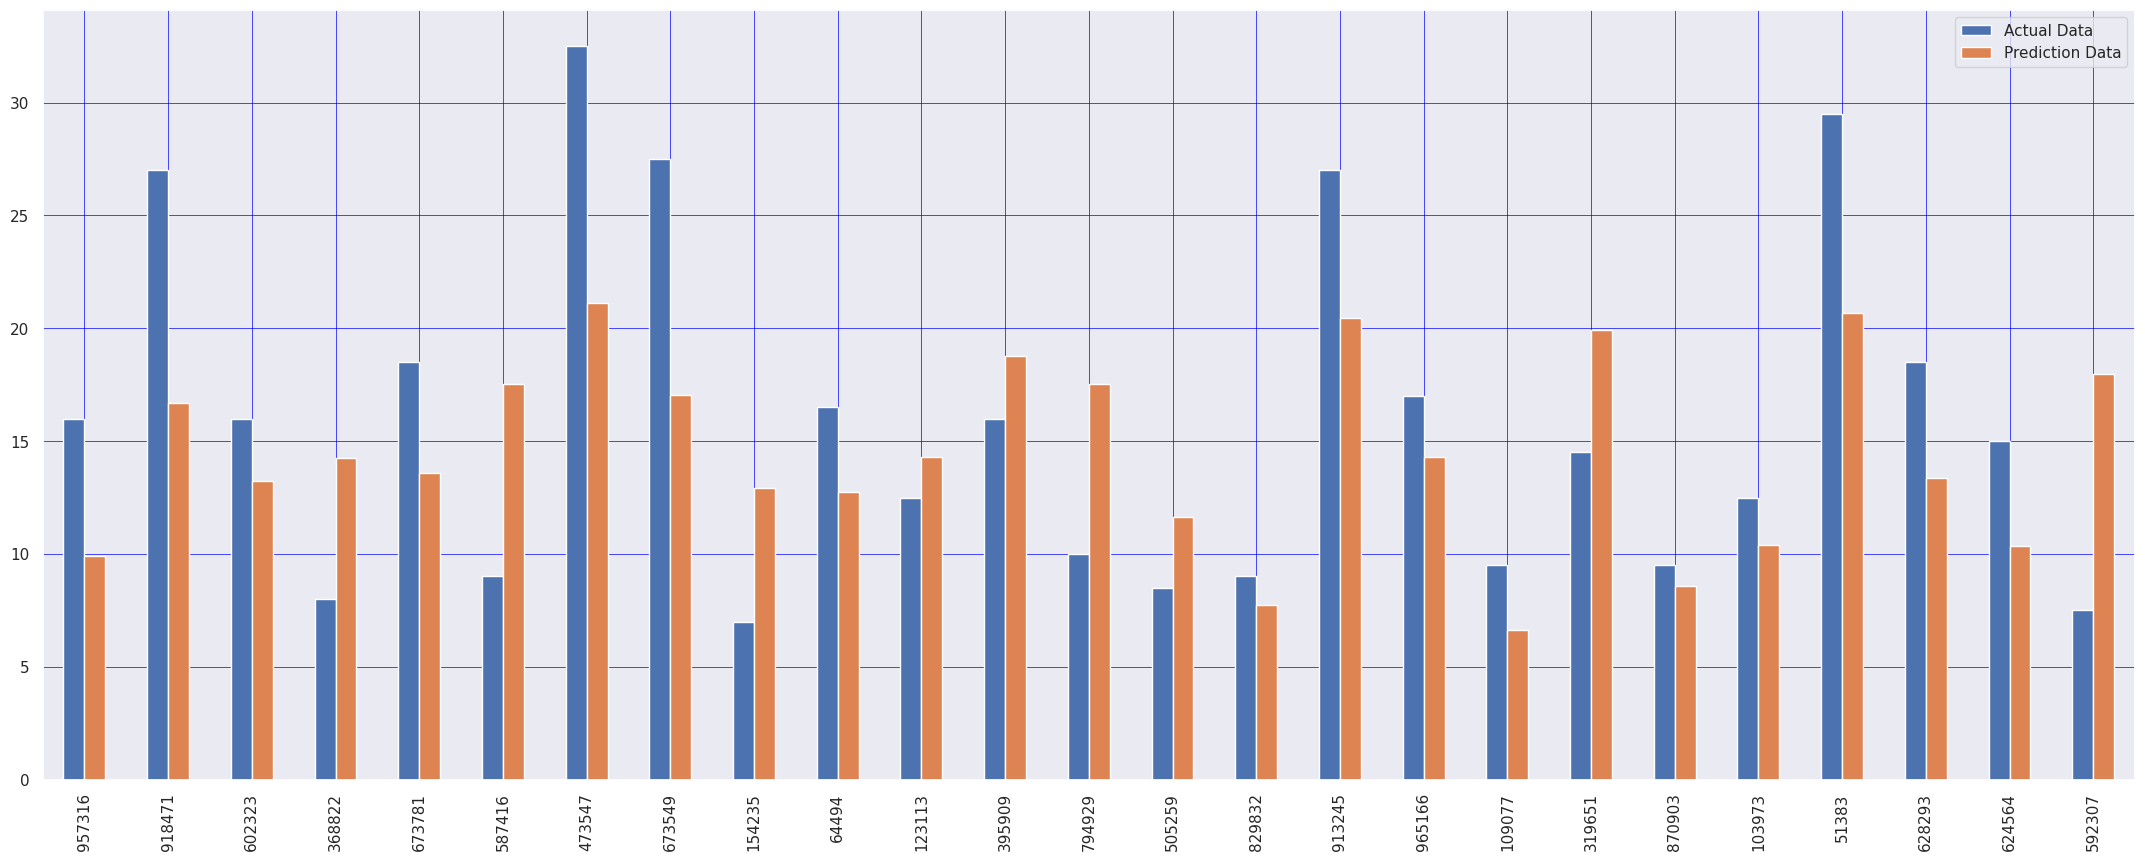

In [153]:
data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Linear Regression

In [155]:
# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

print(f'Scores: {np.round(cv_results, 3)}')
print(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

Scores: [0.41  0.41  0.408 0.411 0.413]
Scores mean: 0.41


# Decision Tree

In [156]:
dt_models = DecisionTreeRegressor()
dt_models.fit(X_train, y_train)
dt_pred = dt_models.predict(X_test)
r2 = r2_score(y_test, dt_pred)
print("r2 Score", r2)

r2 Score 0.9481935230978109


# Random Forest

In [157]:
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest classifier
RF_model = RandomForestRegressor()

# Train the model
RF_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RF_model.predict(X_test)

# Evaluate the accuracy of the model
r2 = r2_score(y_test, y_pred)
print("r2 Score:", r2)

r2 Score: 0.9573756323994906


# XGBoost

In [166]:
X_train.head()

,distance,destination,source,name,temp,location,clouds,pressure,rain,humidity,wind
302861,2.45,10,2,4,37.37,10,0.62,1000.57,0.0,0.71,10.48
359120,1.89,0,9,2,40.97,0,0.97,1014.44,0.0,0.92,1.36
291733,2.73,0,6,1,30.49,0,0.28,1033.84,0.0,0.79,3.33
824466,2.79,1,2,0,55.22,1,0.48,999.24,0.0,0.69,16.26
400938,2.67,2,10,1,40.11,2,0.98,994.96,0.0,0.63,9.69


In [1]:
X_train.head()

NameError: name 'X_train' is not defined

In [160]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

XGB_model = xgb.XGBRegressor()

# Train the model on the training data
XGB_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = XGB_model.predict(X_test)

# Calculate the mean squared error for evaluation
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2 Score:", r2)

Mean Squared Error: 2.8501731842702944
r2 Score: 0.9573756323994906


In [161]:
X1_train.head()

,destination,source,rain
302861,10,2,0.0
359120,0,9,0.0
291733,0,6,0.0
824466,1,2,0.0
400938,2,10,0.0


In [162]:
y1_train.head()

302861    2.45
359120    1.89
291733    2.73
824466    2.79
400938    2.67
Name: distance, dtype: float64

In [163]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

XGB_model_distance= xgb.XGBRegressor()

# Train the model on the training data
XGB_model_distance.fit(X1_train, y1_train)
y1_pred = XGB_model_distance.predict(X1_test)

# Make predictions on the testing data
predictions = XGB_model_distance.predict(X1_test)

# Calculate the mean squared error for evaluation
mse = mean_squared_error(y1_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y1_test, y1_pred)
print("r2 Score:", r2)

Mean Squared Error: 0.07653812310317593
r2 Score: 0.9283566445504419


In [164]:
import pickle
with open('XGB_model_distance.pkl','wb') as file:
    pickle.dump(XGB_model_distance,file)

In [165]:
import pickle
with open('XGB_model.pkl','wb') as file:
    pickle.dump(XGB_model,file)

In [ ]:
import pickle

with open('encoded_value.pkl','wb') as file:
    pickle.dump(classes_and_values,file)

In [ ]:
UberMod.to_csv('final_uber.csv')